## Summarize Relationship Task Results

First run [CollectRelationships.ipynb](CollectRelationships.ipynb) to regenerate [results/predicted-relationships-for-eval.tsv)

In [66]:
import numpy as np
import pandas as pd

In [76]:
MMAP = {
  "RAG+background-gpt-3.5-turbo": ("RAG+bg", "gpt-3.5-turbo"),
  "RAG+background-gpt-4": ("RAG+bg", "gpt-4"),
  "RAG-gpt-3.5-turbo": ("RAG", "gpt-3.5-turbo"),
  "RAG-gpt-4": ("RAG", "gpt-4"),
  "RAG-nous-hermes-13b": ("RAG", "nous-hermes-13b"),
}

In [67]:
def himax(tbl):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.style.hide().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)

### Read in prediction results

Generated by CollectRelationships

In [90]:
df = pd.read_csv("results/predicted-relationships-for-eval.tsv", sep="\t")
df

,ontology,method,term_id,term_label,pred,outcome,qualifier,expected_tgt,predicted_tgt,predicted_tgt_exists,ic_ratio
0,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,PartOf,false_negative,NaN,PlantTypeCellWallAssembly,NaN,True,NaN
1,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,ResultsInAssemblyOf,true_positive,NaN,CasparianStrip,CasparianStrip,True,NaN
2,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,subClassOf,true_positive,NaN,CellularComponentAssembly,CellularComponentAssembly,True,NaN
3,go,RAG+background-gpt-4,GO:0120340,radial spoke base 1,PartOf,true_positive,NaN,RadialSpoke1,RadialSpoke1,True,NaN
4,go,RAG+background-gpt-4,GO:0120340,radial spoke base 1,subClassOf,true_positive,NaN,RadialSpokeBase,RadialSpokeBase,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5298,foodon,RAG+background-gpt-4,FOODON:00004454,green cardamom seed (dried),DerivesFrom,false_positive,NaN,NaN,GreenCardamomPlant,True,NaN
5299,foodon,RAG+background-gpt-4,FOODON:00004454,green cardamom seed (dried),subClassOf,true_positive,NaN,CardamomFoodProduct,CardamomFoodProduct,True,NaN
5300,foodon,RAG+background-gpt-4,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Food_cooked_,False,NaN
5301,foodon,RAG+background-gpt-4,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Common_millet_wholeOrPieces_,False,NaN


In [91]:
df["model_name"] = df.apply(lambda row: MMAP.get(row["method"])[1], axis=1)

In [92]:
df["base_method"] = df.apply(lambda row: MMAP.get(row["method"])[0], axis=1)

In [93]:
df

,ontology,method,term_id,term_label,pred,outcome,qualifier,expected_tgt,predicted_tgt,predicted_tgt_exists,ic_ratio,model_name,base_method
0,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,PartOf,false_negative,NaN,PlantTypeCellWallAssembly,NaN,True,NaN,gpt-4,RAG+bg
1,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,ResultsInAssemblyOf,true_positive,NaN,CasparianStrip,CasparianStrip,True,NaN,gpt-4,RAG+bg
2,go,RAG+background-gpt-4,GO:0160073,Casparian strip assembly,subClassOf,true_positive,NaN,CellularComponentAssembly,CellularComponentAssembly,True,NaN,gpt-4,RAG+bg
3,go,RAG+background-gpt-4,GO:0120340,radial spoke base 1,PartOf,true_positive,NaN,RadialSpoke1,RadialSpoke1,True,NaN,gpt-4,RAG+bg
4,go,RAG+background-gpt-4,GO:0120340,radial spoke base 1,subClassOf,true_positive,NaN,RadialSpokeBase,RadialSpokeBase,True,NaN,gpt-4,RAG+bg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,foodon,RAG+background-gpt-4,FOODON:00004454,green cardamom seed (dried),DerivesFrom,false_positive,NaN,NaN,GreenCardamomPlant,True,NaN,gpt-4,RAG+bg
5299,foodon,RAG+background-gpt-4,FOODON:00004454,green cardamom seed (dried),subClassOf,true_positive,NaN,CardamomFoodProduct,CardamomFoodProduct,True,NaN,gpt-4,RAG+bg
5300,foodon,RAG+background-gpt-4,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Food_cooked_,False,NaN,gpt-4,RAG+bg
5301,foodon,RAG+background-gpt-4,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Common_millet_wholeOrPieces_,False,NaN,gpt-4,RAG+bg


In [94]:
# mote: include qualifier == '' to get all results
df.groupby(['pred']).agg({'outcome': 'count'})

,outcome
pred,
AdjacentTo,14
AttachedTo,1
AxonSynapsesIn,1
BoundingLayerOf,5
CapableOf,41
...,...
inheresIn,2
partOf,1
participatesIn,1


In [95]:
df.groupby(['pred']).size()

pred
AdjacentTo           14
AttachedTo            1
AxonSynapsesIn        1
BoundingLayerOf       5
CapableOf            41
                   ... 
inheresIn             2
partOf                1
participatesIn        1
subClassOf         3703
subclassOf            1
Length: 91, dtype: int64

In [96]:
df.groupby(['method']).size()

method
RAG+background-gpt-3.5-turbo     907
RAG+background-gpt-4             796
RAG-gpt-3.5-turbo               1173
RAG-gpt-4                       1254
RAG-nous-hermes-13b             1173
dtype: int64

In [97]:
df.groupby(['method', 'ontology']).size()

method                        ontology
RAG+background-gpt-3.5-turbo  cl          173
                              envo         90
                              foodon      104
                              go          141
                              mondo       137
                              oba         152
                              obi         110
RAG+background-gpt-4          cl          198
                              envo         87
                              foodon      108
                              go          137
                              mondo       164
                              obi         102
RAG-gpt-3.5-turbo             cl          169
                              envo         86
                              foodon      104
                              go          127
                              hp           79
                              mondo       139
                              mp           71
                              oba        

In [169]:



def compute_metrics_new(input_df: pd.DataFrame, ignore_ungrounded=True, use_partial=True, preds=None, group_by=None, partial_fn_factor=None, outcome_col="outcome") -> pd.DataFrame:
    """
    Compute precision, recall, and F1 score grouped by model_name, method, and ontology.
    
    Parameters:
    - df: DataFrame containing the input data with columns 'model_name', 'method', 'ontology', 'tp', 'fp', 'fn'
    
    Returns:
    - DataFrame with aggregated results.
    """
    input_df = input_df.copy()
    if ignore_ungrounded:
        input_df = input_df.query("predicted_tgt_exists == True")
    if use_partial:
        # set outcome to 'partial_false_negative' if (1)
        # outcome is 'false_negative' and (2) the qualifier is 'partial'
        input_df.loc[(input_df[outcome_col] == 'false_negative') & (input_df['qualifier'] == 'prediction_is_more_general'), outcome_col] = 'partial_false_negative'
    # filter by pred
    if preds is not None:
        input_df = input_df[input_df['pred'].isin(preds)]

    def calculate_metrics_for_group(group):
        tp = len(group[group[outcome_col] == 'true_positive'])
        fp = len(group[group[outcome_col] == 'false_positive'])
        fn = len(group[group[outcome_col] == 'false_negative'])
        tn = len(group[group[outcome_col] == 'true_negative'])
        
        if partial_fn_factor is None:
            partials = group[group[outcome_col] == 'partial_false_negative']
            sum_ic_ratio = partials['ic_ratio'].sum()
            # Calculate the sum of all (1 - 'ic_ratio') values
            sum_inverse_ic_ratio = (1 - partials['ic_ratio']).sum()
            tp += sum_ic_ratio
            fn += sum_inverse_ic_ratio
        else:
            tp += len(group[group[outcome_col] == 'partial_false_negative']) * (1-partial_fn_factor)
            fn += len(group[group[outcome_col] == 'partial_false_negative']) * partial_fn_factor
        
    
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    
        return pd.Series({'precision': precision, 'recall': recall, 'f1': f1_score})
    
    if group_by is None:
        group_by = ['ontology']
    # Group by 'model_name', 'method', and 'ontology' and aggregate tp, fp, and fn
    grouped = input_df.groupby(['model_name', 'method'] + group_by)
    metrics = grouped.apply(calculate_metrics_for_group)

    return metrics.reset_index()


In [111]:
def filter_main(tbl):
    return tbl.query('method.isin(["RAG-gpt-4", "RAG-gpt-3.5-turbo", "RAG-nous-hermes-13b"])')

### SubClassOf Prediction (All Ontologies)

In [170]:
himax(filter_main(compute_metrics_new(df, preds=['subClassOf'], group_by=[])))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.846,0.419,0.561
gpt-4,RAG-gpt-4,0.894,0.500,0.642
nous-hermes-13b,RAG-nous-hermes-13b,0.730,0.353,0.476


### Relationship Prediction (All Predicates, All Ontologies)

In [113]:
himax(filter_main(compute_metrics_new(df, preds=None, group_by=[])))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.758,0.446,0.562
gpt-4,RAG-gpt-4,0.802,0.505,0.620
nous-hermes-13b,RAG-nous-hermes-13b,0.640,0.355,0.457


### Effect of varying penalty for partial false positives

low penalty (low `partial_fn_factor`) vs high penalty (high `partial_fn_factor`)


#### SubClassOf

In [114]:
himax(filter_main(compute_metrics_new(df, preds=['subClassOf'], group_by=[], partial_fn_factor=0.1)))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.855,0.451,0.591
gpt-4,RAG-gpt-4,0.898,0.522,0.661
nous-hermes-13b,RAG-nous-hermes-13b,0.746,0.383,0.506


In [115]:
himax(filter_main(compute_metrics_new(df, preds=['subClassOf'], group_by=[], partial_fn_factor=0.9)))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.816,0.340,0.480
gpt-4,RAG-gpt-4,0.877,0.423,0.571
nous-hermes-13b,RAG-nous-hermes-13b,0.672,0.267,0.382


#### All

In [116]:
himax(filter_main(compute_metrics_new(df, preds=None, group_by=[], partial_fn_factor=0.1)))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.768,0.471,0.584
gpt-4,RAG-gpt-4,0.807,0.522,0.634
nous-hermes-13b,RAG-nous-hermes-13b,0.654,0.378,0.479


In [117]:
himax(filter_main(compute_metrics_new(df, preds=None, group_by=[], partial_fn_factor=0.9)))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.728,0.380,0.499
gpt-4,RAG-gpt-4,0.780,0.442,0.564
nous-hermes-13b,RAG-nous-hermes-13b,0.588,0.285,0.384


## Comparing generate-background method

In [119]:
himax(compute_metrics_new(df, preds=None, group_by=[]))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,0.784,0.467,0.586
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.758,0.446,0.562
gpt-4,RAG+background-gpt-4,0.729,0.487,0.584
gpt-4,RAG-gpt-4,0.802,0.505,0.620
nous-hermes-13b,RAG-nous-hermes-13b,0.640,0.355,0.457


## All Results, gpt-4

In [120]:
m = compute_metrics_new(df)
m.query('model_name=="gpt-4"')

,model_name,method,ontology,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,0.790508,0.431252,0.558061
18,gpt-4,RAG+background-gpt-4,envo,0.927498,0.609180,0.735370
19,gpt-4,RAG+background-gpt-4,foodon,0.742048,0.663851,0.700775
20,gpt-4,RAG+background-gpt-4,go,0.823860,0.565387,0.670578
21,gpt-4,RAG+background-gpt-4,mondo,0.439011,0.293463,0.351776
22,gpt-4,RAG+background-gpt-4,obi,0.690546,0.431903,0.531426
23,gpt-4,RAG-gpt-4,cl,0.876521,0.473235,0.614630
24,gpt-4,RAG-gpt-4,envo,0.853274,0.656581,0.742115
25,gpt-4,RAG-gpt-4,foodon,0.822385,0.661452,0.733191
26,gpt-4,RAG-gpt-4,go,0.896380,0.564171,0.692495


In [121]:
compute_metrics_new(df, preds=['subClassOf']).query('model_name=="gpt-4"')

,model_name,method,ontology,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,0.940652,0.487684,0.642343
18,gpt-4,RAG+background-gpt-4,envo,0.972511,0.707567,0.819148
19,gpt-4,RAG+background-gpt-4,foodon,0.923372,0.634216,0.751954
20,gpt-4,RAG+background-gpt-4,go,0.919894,0.564757,0.699850
21,gpt-4,RAG+background-gpt-4,mondo,0.654357,0.289232,0.401152
22,gpt-4,RAG+background-gpt-4,obi,1.000000,0.467510,0.637147
23,gpt-4,RAG-gpt-4,cl,0.971363,0.521836,0.678935
24,gpt-4,RAG-gpt-4,envo,0.948331,0.749143,0.837050
25,gpt-4,RAG-gpt-4,foodon,0.945462,0.630390,0.756429
26,gpt-4,RAG-gpt-4,go,0.920852,0.562964,0.698748


In [122]:
result_df = compute_metrics_new(df)

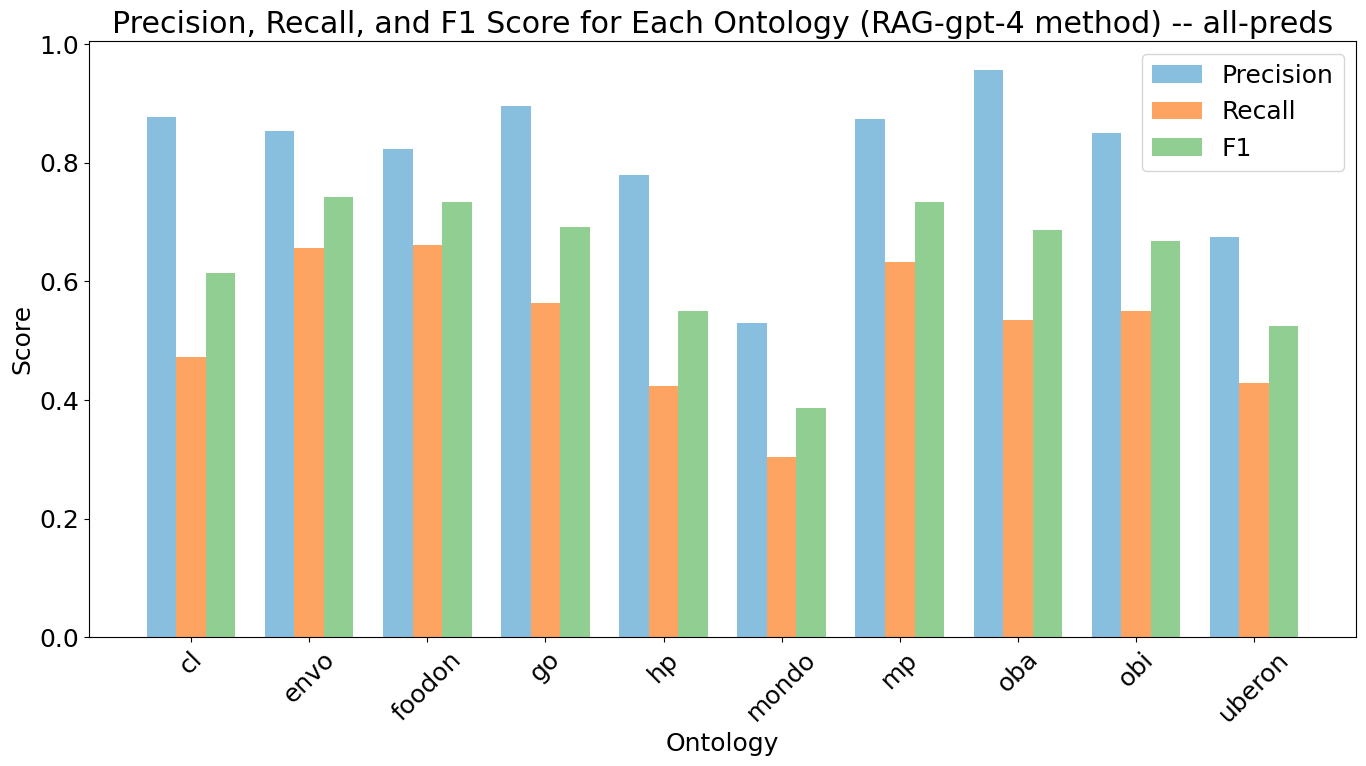

In [123]:
# Importing required libraries
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18}) # Set default font size


def plot_results(data_df, name, method='RAG-gpt-4', **kwargs):

    result_df = compute_metrics_new(df, **kwargs)
    # Adjusting the colors to be less garish
    colors = ['#6baed6', '#fd8d3c', '#74c476']
    
    # Setting up the figure and axis
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Set the bar width
    bar_width = 0.25
    
    grouped_data = result_df.query(f"method=='{method}'")[["model_name", "ontology", "precision", "recall", "f1"]]
    # Set the index for each ontology
    indices = range(len(grouped_data))
    
    # Plot precision bars with adjusted color
    rects1 = ax.bar(indices, grouped_data['precision'], bar_width, label='Precision', color=colors[0], alpha=0.8)
    
    # Plot recall bars (shifted by bar_width) with adjusted color
    rects2 = ax.bar([i + bar_width for i in indices], grouped_data['recall'], bar_width, label='Recall', color=colors[1], alpha=0.8)
    
    # Plot F1 score bars (shifted by 2*bar_width) with adjusted color
    rects3 = ax.bar([i + 2*bar_width for i in indices], grouped_data['f1'], bar_width, label='F1', color=colors[2], alpha=0.8)
    
    # Set the title and labels
    ax.set_xlabel('Ontology')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, Recall, and F1 Score for Each Ontology ({method} method) -- {name}')
    ax.set_xticks([i + bar_width for i in indices])
    ax.set_xticklabels(grouped_data['ontology'])
    ax.legend()
    
    # Rotate x labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig(f"results/relationships-{name}.png")
    plt.show()

plot_results(df, "all-preds")

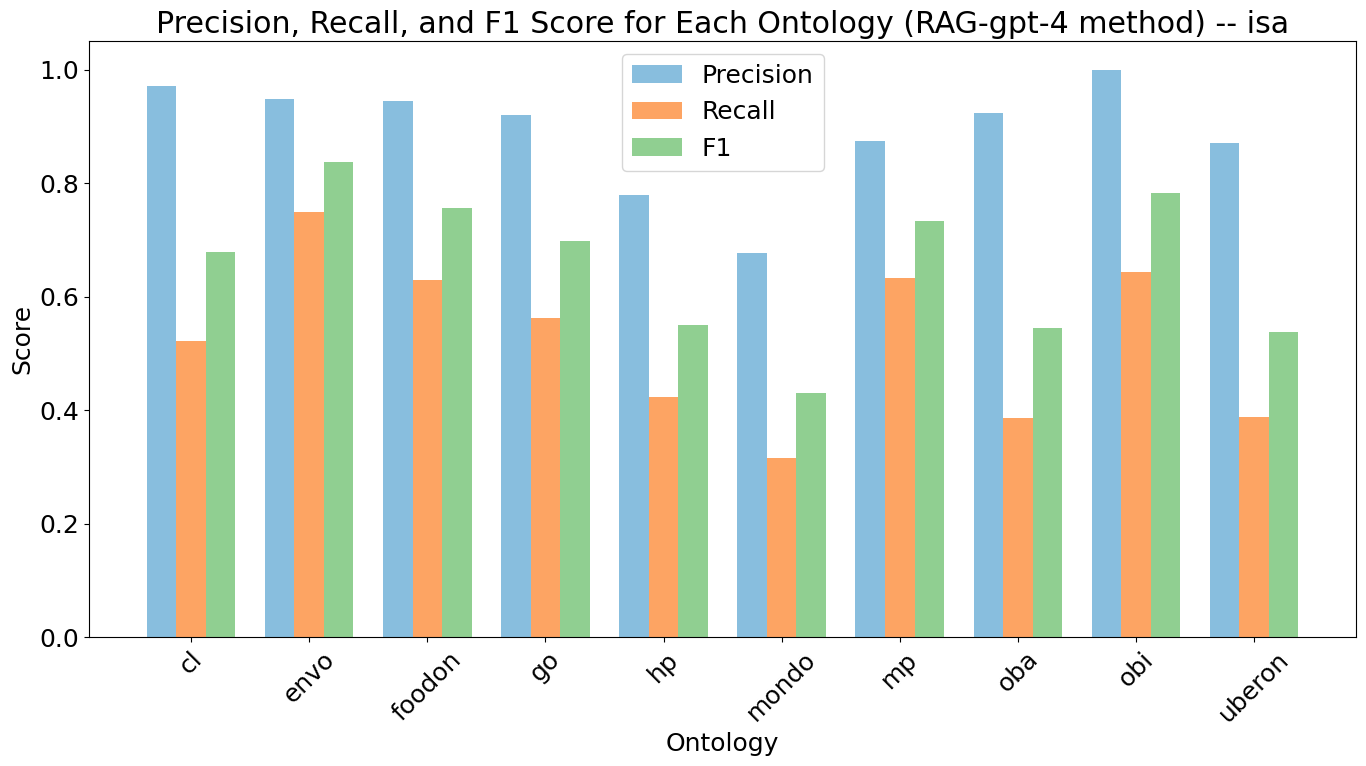

In [124]:
plot_results(df, "isa", preds=["subClassOf"])

In [125]:
#isa_df = pd.read_csv("results/relationship-analysis-isa.tsv", sep="\t")
#isa_df

## Manual Assessment

In [140]:
EVALS = {"cjm": ["uberon"], "st": ["hp", "mp"]}
dfs = []
last_df = None
for k, onts in EVALS.items():
    xdf = pd.read_csv(f"results/manual-relation-eval/rel-eval.{k}.tsv", sep="\t")
    last_df = xdf.copy()
    xdf = xdf[xdf["ontology"].isin(onts)]
    dfs.append(xdf)

manual_df = pd.concat(dfs)

In [142]:
OUTCOME_NORM = {
    "TP": "true_positive",
    "FP": "false_positive",
    "FN": "false_negative",
    "TN": "true_negative",
    "TP*": "true_positive",
    "ENTAILED": "true_positive",
}
manual_df["normalized_eval_outcome"] = manual_df.apply(lambda row: OUTCOME_NORM.get(row['Eval'], row['outcome']), axis=1)
manual_df

,ontology,term_id,term_label,pred,outcome,qualifier,expected_tgt,predicted_tgt,review,notes,predicted_tgt_exists,Eval,"If new term, is it valid?",Issue URL,Notes,normalized_eval_outcome
417,uberon,UBERON:0006562,pharynx,OnlyInTaxon,false_negative,NaN,Bilateria,NaN,NaN,TC,True,NaN,NaN,NaN,NaN,false_negative
418,uberon,UBERON:0006562,pharynx,subClassOf,false_positive,NaN,NaN,OrganismPart,NaN,NaN,False,TP,Yes,NaN,NaN,true_positive
419,uberon,UBERON:0006562,pharynx,subClassOf,false_negative,NaN,SubdivisionOfDigestiveTract,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,false_negative
420,uberon,UBERON:8480060,paraspinal region,OnlyInTaxon,false_negative,NaN,Vertebrata_vertebrates_,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,false_negative
421,uberon,UBERON:8480060,paraspinal region,subClassOf,false_negative,NaN,PosteriorRegionOfBody,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,false_negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,mp,MP:0031474,increased female germ cell apoptosis,subClassOf,true_positive,NaN,AbnormalFemaleGermCellApoptosis,AbnormalFemaleGermCellApoptosis,OK,NaN,True,NaN,NaN,NaN,NaN,true_positive
618,mp,MP:0014278,semilobar holoprosencephaly,subClassOf,true_positive,NaN,Holoprosencephaly,Holoprosencephaly,OK,NaN,True,NaN,NaN,NaN,NaN,true_positive
619,mp,MP:0014246,decreased cellular ATP level,subClassOf,true_positive,NaN,AbnormalCellularATPLevel,AbnormalCellularATPLevel,OK,NaN,True,NaN,NaN,NaN,NaN,true_positive
620,mp,MP:0014246,decreased cellular ATP level,subClassOf,false_positive,NaN,NaN,DecreasedATPLevel,correct,This term is not in the 2023-08-09/mo.owl onto...,False,NaN,NaN,NaN,NaN,false_positive


In [165]:
JCOLS = ['term_id', 'pred', 'outcome', 'expected_tgt', 'predicted_tgt']
lookup = {}
for _, row in manual_df.iterrows():
    k: pd.Series = row[JCOLS]
    k = tuple(k.tolist())
    lookup[k] = row["normalized_eval_outcome"]

len(lookup)

335

In [172]:

rows = []
diffs = []
for _, row in df.iterrows():
    k = row[JCOLS]
    k = tuple(k.tolist())
    if k in lookup:
        diff = lookup[k] == row["outcome"]
        diffs.append(diff)
        row["normalized_eval_outcome"] = lookup[k]
        
    else:
        row["normalized_eval_outcome"] = row["outcome"]
    rows.append(row)

dfn = pd.DataFrame(rows)
len(diffs)


725

In [186]:
dfn_filtered = dfn[(dfn["method"]=='RAG-gpt-4') & (dfn["ontology"].isin(["uberon", "hp"]))]

In [187]:
compute_metrics_new(dfn_filtered, preds=None, group_by=["ontology"], outcome_col="outcome")

,model_name,method,ontology,precision,recall,f1
0,gpt-4,RAG-gpt-4,hp,0.779527,0.424284,0.549490
1,gpt-4,RAG-gpt-4,uberon,0.674883,0.429480,0.524915


In [188]:
compute_metrics_new(dfn_filtered, preds=None, group_by=["ontology"], outcome_col="normalized_eval_outcome")

,model_name,method,ontology,precision,recall,f1
0,gpt-4,RAG-gpt-4,hp,0.783885,0.435261,0.559727
1,gpt-4,RAG-gpt-4,uberon,0.743050,0.468506,0.574671


In [189]:
compute_metrics_new(dfn_filtered, preds=["subClassOf"], group_by=["ontology"], outcome_col="outcome")

,model_name,method,ontology,precision,recall,f1
0,gpt-4,RAG-gpt-4,hp,0.779527,0.424284,0.549490
1,gpt-4,RAG-gpt-4,uberon,0.870822,0.388919,0.537696


In [190]:
compute_metrics_new(dfn_filtered, preds=["subClassOf"], group_by=["ontology"], outcome_col="normalized_eval_outcome")

,model_name,method,ontology,precision,recall,f1
0,gpt-4,RAG-gpt-4,hp,0.783885,0.435261,0.559727
1,gpt-4,RAG-gpt-4,uberon,0.871191,0.397849,0.546244


In [153]:
merged_df[merged_df["normalized_eval_outcome"] == 'true_positive']

,ontology,method,term_id,term_label,pred,outcome,qualifier,expected_tgt,predicted_tgt,predicted_tgt_exists,ic_ratio,model_name,base_method,normalized_eval_outcome
141,hp,RAG-gpt-4,HP:0034566,Aplasia of posterior communicating artery,subClassOf,true_positive,,AbnormalPosteriorCirculatingArteryMorphology,AbnormalPosteriorCirculatingArteryMorphology,True,,gpt-4,RAG,true_positive
142,hp,RAG-gpt-4,HP:0034888,Decreased urine guanidinoacetic acid level,subClassOf,false_positive,,,DecreasedUrineMetaboliteLevel,False,,gpt-4,RAG,true_positive
144,hp,RAG-gpt-4,HP:0034580,Reduced epidermal plectin protein expression,subClassOf,false_positive,,,AbnormalPlectinExpression,False,,gpt-4,RAG,true_positive
146,hp,RAG-gpt-4,HP:0034808,Eyelid pain,subClassOf,true_positive,,AbnormalEyelidPhysiology,AbnormalEyelidPhysiology,True,,gpt-4,RAG,true_positive
147,hp,RAG-gpt-4,HP:0034819,Iris nodule,subClassOf,true_positive,,AbnormalityIrisMorphology,AbnormalityIrisMorphology,True,,gpt-4,RAG,true_positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,uberon,RAG-gpt-4,UBERON:8600005,visceral smooth muscle tissue,subClassOf,true_positive,,SmoothMuscleTissue,SmoothMuscleTissue,True,,gpt-4,RAG,true_positive
5043,uberon,RAG-gpt-4,UBERON:8480065,labial gland,subClassOf,true_positive,,MinorSalivaryGland,MinorSalivaryGland,True,,gpt-4,RAG,true_positive
5044,uberon,RAG-gpt-4,UBERON:8480065,labial gland,subClassOf,true_positive,,MinorSalivaryGland,MinorSalivaryGland,True,,gpt-4,RAG,true_positive
5057,uberon,RAG-gpt-4,UBERON:0700020,"parallel fiber, bifurcated",subClassOf,true_positive,,ParallelFiber,ParallelFiber,True,,gpt-4,RAG,true_positive


## Comparison - owl2vec

In [126]:
isa_metrics = compute_metrics_new(df, preds=["subClassOf"])
isa_metrics

,model_name,method,ontology,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,cl,0.969690,0.492193,0.652959
1,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,envo,1.000000,0.670151,0.802503
2,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,foodon,0.855363,0.430098,0.572386
3,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,go,0.861953,0.495547,0.629301
4,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,mondo,0.515273,0.203866,0.292146
5,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,oba,0.956611,0.459317,0.620636
6,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,obi,0.962656,0.486378,0.646244
7,gpt-3.5-turbo,RAG-gpt-3.5-turbo,cl,0.891810,0.380444,0.533359
8,gpt-3.5-turbo,RAG-gpt-3.5-turbo,envo,0.940367,0.671034,0.783192
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,0.853753,0.530706,0.654540


In [127]:
#isa_metrics = compute_metrics(isa_df)
owl2vec_compare = isa_metrics.query("(ontology == 'go' or ontology=='foodon') and method in ['RAG-gpt-4', 'RAG-gpt-3.5-turbo', 'RAG-nous-hermes-13b']")[["model_name", "method", "ontology", "precision"]]
owl2vec_compare

,model_name,method,ontology,precision
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,0.853753
10,gpt-3.5-turbo,RAG-gpt-3.5-turbo,go,0.962139
25,gpt-4,RAG-gpt-4,foodon,0.945462
26,gpt-4,RAG-gpt-4,go,0.920852
35,nous-hermes-13b,RAG-nous-hermes-13b,foodon,0.858103
36,nous-hermes-13b,RAG-nous-hermes-13b,go,0.677918


In [128]:
rows = [{
  "method": "owl2vec*",
  "ontology": "foodon",
  "precision": 0.143,
},{
    "method": "owl2vec*",
    "ontology": "go",
    "precision": 0.076
},
       {
  "method": "rdf2vec",
  "ontology": "foodon",
  "precision": 0.053,
},{
    "method": "rdf2vec",
    "ontology": "go",
    "precision": 0.017
}
       ]

owl2vec_compare2 = pd.concat([pd.DataFrame(rows), owl2vec_compare])
subset = owl2vec_compare2.select_dtypes(include=[np.number]).columns
owl2vec_compare2.style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,ontology,precision,model_name
owl2vec*,foodon,0.143,nan
owl2vec*,go,0.076,nan
rdf2vec,foodon,0.053,nan
rdf2vec,go,0.017,nan
RAG-gpt-3.5-turbo,foodon,0.854,gpt-3.5-turbo
RAG-gpt-3.5-turbo,go,0.962,gpt-3.5-turbo
RAG-gpt-4,foodon,0.945,gpt-4
RAG-gpt-4,go,0.921,gpt-4
RAG-nous-hermes-13b,foodon,0.858,nous-hermes-13b
RAG-nous-hermes-13b,go,0.678,nous-hermes-13b


In [129]:
precision_pivot = owl2vec_compare2.pivot_table(index='method', columns='ontology', values='precision', aggfunc='mean').reset_index()
subset = precision_pivot.select_dtypes(include=[np.number]).columns
precision_pivot.sort_values("foodon").style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,foodon,go
rdf2vec,0.053,0.017
owl2vec*,0.143,0.076
RAG-gpt-3.5-turbo,0.854,0.962
RAG-nous-hermes-13b,0.858,0.678
RAG-gpt-4,0.945,0.921


## Comparison - Elk

In [130]:
elk_df = pd.read_csv("results/elk/all-outcomes.csv")

In [131]:
def calculate_elk_metrics(tp: int, fn: int):
    fp = 0 # all OWL reasoner results are valid by definition

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score


In [132]:
for index, row in elk_df.iterrows():
    precision, recall, f1 = calculate_elk_metrics(row['tp'], row['fn'])
    elk_df.at[index, 'precision'] = precision
    elk_df.at[index, 'recall'] = recall
    elk_df.at[index, 'f1'] = f1
    elk_df.at[index, 'model_name'] = 'elk'
    elk_df.at[index, 'method'] = 'reasoning'

elk_df

,ontology,tp,fn,notes,precision,recall,f1,model_name,method
0,cl,26,39,NaN,1.0,0.400000,0.571429,elk,reasoning
1,envo,3,41,NaN,1.0,0.068182,0.127660,elk,reasoning
2,foodon,8,46,NaN,1.0,0.148148,0.258065,elk,reasoning
3,go,20,43,NaN,1.0,0.317460,0.481928,elk,reasoning
4,hp,1,50,NaN,1.0,0.019608,0.038462,elk,reasoning
5,mondo,23,52,NaN,1.0,0.306667,0.469388,elk,reasoning
6,mp,20,37,NaN,1.0,0.350877,0.519481,elk,reasoning
7,oba,79,0,NaN,1.0,1.000000,1.000000,elk,reasoning
8,obi,11,41,NaN,1.0,0.211538,0.349206,elk,reasoning
9,uberon,9,45,NaN,1.0,0.166667,0.285714,elk,reasoning


In [133]:
all_df = pd.concat([elk_df, isa_metrics])
all_df

,ontology,tp,fn,notes,precision,recall,f1,model_name,method
0,cl,26.0,39.0,NaN,1.000000,0.400000,0.571429,elk,reasoning
1,envo,3.0,41.0,NaN,1.000000,0.068182,0.127660,elk,reasoning
2,foodon,8.0,46.0,NaN,1.000000,0.148148,0.258065,elk,reasoning
3,go,20.0,43.0,NaN,1.000000,0.317460,0.481928,elk,reasoning
4,hp,1.0,50.0,NaN,1.000000,0.019608,0.038462,elk,reasoning
5,mondo,23.0,52.0,NaN,1.000000,0.306667,0.469388,elk,reasoning
6,mp,20.0,37.0,NaN,1.000000,0.350877,0.519481,elk,reasoning
7,oba,79.0,0.0,NaN,1.000000,1.000000,1.000000,elk,reasoning
8,obi,11.0,41.0,NaN,1.000000,0.211538,0.349206,elk,reasoning
9,uberon,9.0,45.0,NaN,1.000000,0.166667,0.285714,elk,reasoning


In [134]:
f1_pivot = all_df.pivot_table(index='method', columns='ontology', values='f1', aggfunc='mean').reset_index()
subset = f1_pivot.select_dtypes(include=[np.number]).columns
f1_pivot

ontology,method,cl,envo,foodon,go,hp,mondo,mp,oba,obi,uberon
0,RAG+background-gpt-3.5-turbo,0.652959,0.802503,0.572386,0.629301,NaN,0.292146,NaN,0.620636,0.646244,NaN
1,RAG+background-gpt-4,0.642343,0.819148,0.751954,0.699850,NaN,0.401152,NaN,NaN,0.637147,NaN
2,RAG-gpt-3.5-turbo,0.533359,0.783192,0.654540,0.581434,0.424786,0.405257,0.662310,0.506193,0.680980,0.404982
3,RAG-gpt-4,0.678935,0.837050,0.756429,0.698748,0.549490,0.430790,0.734023,0.545017,0.783674,0.537696
4,RAG-nous-hermes-13b,0.479789,0.797952,0.581551,0.430806,0.416080,0.229192,0.611605,0.411794,0.502282,0.339305
5,reasoning,0.571429,0.127660,0.258065,0.481928,0.038462,0.469388,0.519481,1.000000,0.349206,0.285714


In [135]:
himax(f1_pivot.query("method != 'RAG+background-gpt-3.5-turbo' and method != 'RAG+background-gpt-4'"))

method,cl,envo,foodon,go,hp,mondo,mp,oba,obi,uberon
RAG-gpt-3.5-turbo,0.533,0.783,0.655,0.581,0.425,0.405,0.662,0.506,0.681,0.405
RAG-gpt-4,0.679,0.837,0.756,0.699,0.549,0.431,0.734,0.545,0.784,0.538
RAG-nous-hermes-13b,0.480,0.798,0.582,0.431,0.416,0.229,0.612,0.412,0.502,0.339
reasoning,0.571,0.128,0.258,0.482,0.038,0.469,0.519,1.000,0.349,0.286


In [136]:
#

In [137]:
tp = elk_df['tp'].sum()
fn = elk_df['fn'].sum()

In [138]:
recall = tp / (tp + fn) 
recall

0.3367003367003367

In [139]:
f1_score = 2 * (1 * recall) / (1 + recall)
f1_score

0.5037783375314862